In [349]:
# data
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import tensorflow as tf

# tqdm
from tqdm import tqdm_notebook as tqdm

tf.set_random_seed(777)  # reproducibility

# layers
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope

In [350]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]

In [351]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [352]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


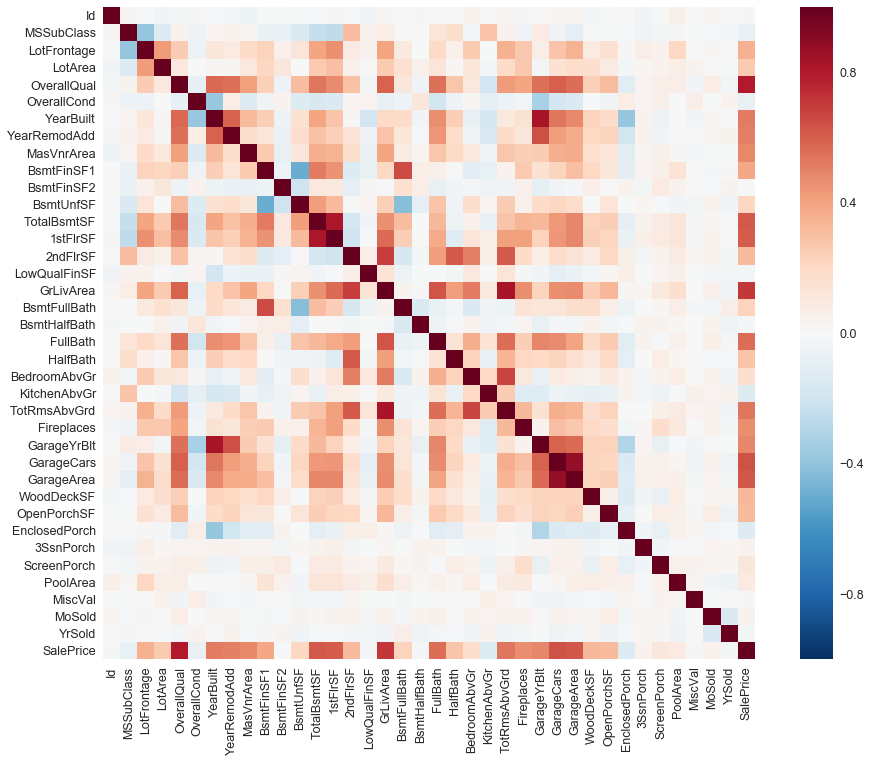

In [353]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=1.0, square=True);

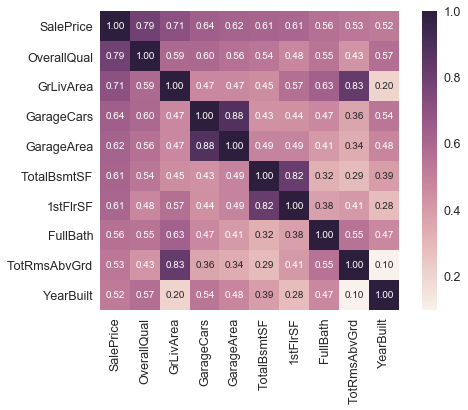

In [204]:
k_number = 10
cols = corrmat.nlargest(k_number, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)

In [205]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [206]:
train_labels = train_df.pop('SalePrice')
train_labels

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [207]:
features = pd.concat([train_df, test_df], keys = ['train_df', 'test_df'])
features

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
train_df 0        1          60       RL         65.0     8450   Pave   NaN   
         1        2          20       RL         80.0     9600   Pave   NaN   
         2        3          60       RL         68.0    11250   Pave   NaN   
         3        4          70       RL         60.0     9550   Pave   NaN   
         4        5          60       RL         84.0    14260   Pave   NaN   
         5        6          50       RL         85.0    14115   Pave   NaN   
         6        7          20       RL         75.0    10084   Pave   NaN   
         7        8          60       RL          NaN    10382   Pave   NaN   
         8        9          50       RM         51.0     6120   Pave   NaN   
         9       10         190       RL         50.0     7420   Pave   NaN   
         10      11          20       RL         70.0    11200   Pave   NaN   
         11      12          60       RL         85.0    11924   Pave   NaN   
         12      13          20       RL          NaN    12968   Pave   NaN   
         13      14          20       RL         91.0    10652   Pave   NaN   
         14      15          20       RL          NaN    10920   Pave   NaN   
         15      16          45       RM         51.0     6120   Pave   NaN   
         16      17          20       RL          NaN    11241   Pave   NaN   
         17      18          90       RL         72.0    10791   Pave   NaN   
         18      19          20       RL         66.0    13695   Pave   NaN   
         19      20          20       RL         70.0     7560   Pave   NaN   
         20      21          60       RL        101.0    14215   Pave   NaN   
         21      22          45       RM         57.0     7449   Pave  Grvl   
         22      23          20       RL         75.0     9742   Pave   NaN   
         23      24         120       RM         44.0     4224   Pave   NaN   
         24      25          20       RL          NaN     8246   Pave   NaN   
         25      26          20       RL        110.0    14230   Pave   NaN   
         26      27          20       RL         60.0     7200   Pave   NaN   
         27      28          20       RL         98.0    11478   Pave   NaN   
         28      29          20       RL         47.0    16321   Pave   NaN   
         29      30          30       RM         60.0     6324   Pave   NaN   
...             ...         ...      ...          ...      ...    ...   ...   
test_df  1429  2890          30       RM         50.0     7030   Pave   NaN   
         1430  2891          50       RM         75.0     9060   Pave   NaN   
         1431  2892          30  C (all)         69.0    12366   Pave   NaN   
         1432  2893         190  C (all)         50.0     9000   Pave   NaN   
         1433  2894          50  C (all)         60.0     8520   Grvl   NaN   
         1434  2895         120       RM         41.0     5748   Pave   NaN   
         1435  2896         120       RM         44.0     3842   Pave   NaN   
         1436  2897          20       RL         69.0    23580   Pave   NaN   
         1437  2898          90       RL         65.0     8385   Pave   NaN   
         1438  2899          20       RL         70.0     9116   Pave   NaN   
         1439  2900          80       RL        140.0    11080   Pave   NaN   
         1440  2901          20       RL          NaN    50102   Pave   NaN   
         1441  2902          20       RL          NaN     8098   Pave   NaN   
         1442  2903          20       RL         95.0    13618   Pave   NaN   
         1443  2904          20       RL         88.0    11577   Pave   NaN   
         1444  2905          20      NaN        125.0    31250   Pave   NaN   
         1445  2906          90       RM         78.0     7020   Pave   NaN   
         1446  2907         160       RM         41.0     2665   Pave   NaN   
         1447  2908          20       RL         58.0    10172   Pa

In [208]:
NAs = pd.concat([train_df.isnull().sum().sort_values(ascending=False), test_df.isnull().sum().sort_values(ascending=False)], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
Alley,1369,1352
BsmtCond,37,45
BsmtExposure,38,44
BsmtFinSF1,0,1
BsmtFinSF2,0,1
BsmtFinType1,37,42
BsmtFinType2,38,42
BsmtFullBath,0,2
BsmtHalfBath,0,2
BsmtQual,37,44


In [209]:
# TotalBsmtSF  NA in pred. I suppose NA means 0
features['TotalBsmtSF'] = features['TotalBsmtSF'].fillna(0)

# Electrical NA in pred. filling with most popular values
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

# KitchenQual NA in pred. filling with most popular values
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])

# FireplaceQu  NA in all. NA means No Fireplace
features['FireplaceQu'] = features['FireplaceQu'].fillna('NoFP')

# GarageCars  NA in pred. I suppose NA means 0
features['GarageCars'] = features['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [347]:
features[['OverallQual', 'GrLivArea', 'GarageCars','TotalSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'Electrical', 'KitchenQual', 'FireplaceQu', 'SaleType'
         ]].describe()

,OverallQual,GrLivArea,GarageCars,TotalSF,FullBath,TotRmsAbvGrd,YearBuilt
count,2919.000000,2919.000000,2919.000000,2919.00000,2919.000000,2919.000000,2919.000000
mean,6.089072,1500.759849,1.766016,2547.48270,1.568003,6.451524,1971.312778
std,1.409947,506.051045,0.762196,805.12084,0.552969,1.569379,30.291442
min,1.000000,334.000000,0.000000,334.00000,0.000000,2.000000,1872.000000
25%,5.000000,1126.000000,1.000000,2000.00000,1.000000,5.000000,1953.500000
50%,6.000000,1444.000000,2.000000,2448.00000,2.000000,6.000000,1973.000000
75%,7.000000,1743.500000,2.000000,2991.50000,2.000000,7.000000,2001.000000
max,10.000000,5642.000000,5.000000,11752.00000,4.000000,15.000000,2010.000000


In [348]:
features[['OverallQual', 'KitchenQual', 'GrLivArea', 'GarageCars','TotalSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'Electrical', 'KitchenQual', 'FireplaceQu', 'SaleType'
         ]].describe(include=['O'])

,KitchenQual,Electrical,KitchenQual,FireplaceQu,SaleType
count,2919,2919,2919,2919,2919
unique,4,5,4,6,9
top,TA,SBrkr,TA,NoFP,WD
freq,1493,2672,1493,1420,2526


In [212]:
x_features = features[['Id', 'OverallQual', 'KitchenQual', 'GrLivArea', 'GarageCars','TotalSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'Electrical', 'FireplaceQu', 'SaleType'
         ]]
x_features

Id  OverallQual KitchenQual  GrLivArea  GarageCars  TotalSF  \
train_df 0        1            7          Gd       1710         2.0   2566.0   
         1        2            6          TA       1262         2.0   2524.0   
         2        3            7          Gd       1786         2.0   2706.0   
         3        4            7          Gd       1717         3.0   2473.0   
         4        5            8          Gd       2198         3.0   3343.0   
         5        6            5          TA       1362         2.0   2158.0   
         6        7            8          Gd       1694         2.0   3380.0   
         7        8            7          TA       2090         2.0   3197.0   
         8        9            7          TA       1774         2.0   2726.0   
         9       10            5          TA       1077         1.0   2068.0   
         10      11            5          TA       1040         1.0   2080.0   
         11      12            9          Ex       2324         3.0   3499.0   
         12      13            5          TA        912         1.0   1824.0   
         13      14            7          Gd       1494         3.0   2988.0   
         14      15            6          TA       1253         1.0   2506.0   
         15      16            7          TA        854         2.0   1686.0   
         16      17            6          TA       1004         2.0   2008.0   
         17      18            4          TA       1296         2.0   1296.0   
         18      19            5          Gd       1114         2.0   2228.0   
         19      20            5          TA       1339         1.0   2368.0   
         20      21            8          Gd       2376         3.0   3534.0   
         21      22            7          Gd       1108         1.0   1745.0   
         22      23            8          Gd       1795         2.0   3572.0   
         23      24            5          TA       1060         2.0   2100.0   
         24      25            5          Gd       1060         1.0   2120.0   
         25      26            8          Gd       1600         3.0   3166.0   
         26      27            5          Gd        900         2.0   1800.0   
         27      28            8          Gd       1704         3.0   3408.0   
         28      29            5          TA       1600         1.0   3084.0   
         29      30            4          Fa        520         1.0   1040.0   
...             ...          ...         ...        ...         ...      ...   
test_df  1429  2890            4          Fa        641         1.0   1282.0   
         1430  2891            6          Gd       1638         1.0   2605.0   
         1431  2892            3          TA        729         0.0    729.0   
         1432  2893            5          TA       1396         0.0   2056.0   
         1433  2894            3          TA        936         0.0   1152.0   
         1434  2895            8          Ex       1778         2.0   3351.0   
         1435  2896            8          Gd       1646         2.0   3240.0   
         1436  2897            6          Fa       1625         2.0   3250.0   
         1437  2898            6          TA       1664         2.0   3328.0   
         1438  2899            8          Gd       1491         2.0   2982.0   
         1439  2900            6          TA       1210         2.0   2338.0   
         1440  2901            6          TA       1650         2.0   3282.0   
         1441  2902            6          Gd       1403         2.0   2784.0   
         1442  2903            8          Gd       1960         3.0   3688.0   
         1443  2904            9          Ex       1838         3.0   3676.0   
         1444  2905            1          TA       1600         1.0   1600.0   
         1445  2906            7          TA       1368         4.0   2656.0   
         1446  2907            5          TA       1304         1.0   1568.0   
         1447  29

### Standardizing numeric data

In [213]:
numeric_features = x_features.loc[:, ['GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean()) / numeric_features.std()

numeric_features_standardized

GrLivArea   TotalSF
train_df 0      0.413476  0.022999
         1     -0.471810 -0.029167
         2      0.563659  0.196886
         3      0.427309 -0.092511
         4      1.377806  0.988072
         5     -0.274201 -0.483757
         6      0.381859  1.034028
         7      1.164389  0.806733
         8      0.539946  0.221727
         9     -0.837386 -0.595541
         10    -0.910501 -0.580637
         11     1.626793  1.181832
         12    -1.163440 -0.898601
         13    -0.013358  0.547144
         14    -0.489595 -0.051524
         15    -1.278053 -1.070004
         16    -0.981640 -0.670064
         17    -0.404623 -1.554404
         18    -0.764270 -0.396813
         19    -0.319651 -0.222926
         20     1.729549  1.225303
         21    -0.776127 -0.996723
         22     0.581444  1.272501
         23    -0.870979 -0.555796
         24    -0.870979 -0.530955
         25     0.196107  0.768229
         26    -1.187153 -0.928411
         27     0.401620  1.068805
         28     0.196107  0.666381
         29    -1.938065 -1.872368
...                  ...       ...
test_df  1429  -1.698959 -1.571792
         1430   0.271198  0.071439
         1431  -1.525063 -2.258646
         1432  -0.207014 -0.610446
         1433  -1.116014 -1.733259
         1434   0.547850  0.998008
         1435   0.287007  0.860141
         1436   0.245509  0.872561
         1437   0.322576  0.969441
         1438  -0.019286  0.539692
         1439  -0.574566 -0.260188
         1440   0.294911  0.912307
         1441  -0.193182  0.293766
         1442   0.907498  1.416579
         1443   0.666415  1.401674
         1444   0.196107 -1.176820
         1445  -0.262345  0.134784
         1446  -0.388814 -1.216566
         1447  -1.238531 -1.005418
         1448   0.298863  0.939632
         1449  -1.720696 -1.599117
         1450  -0.807744 -1.129623
         1451  -0.278153 -0.103690
         1452  -0.807744 -1.129623
         1453  -0.807744 -1.129623
         1454  -0.807744 -1.129623
         1455  -0.807744 -1.129623
         1456  -0.546901 -0.123562
         1457  -1.048827 -0.826563
         1458   0.986541  0.557081

[2919 rows x 2 columns]

### Converting categorical data to dummies

In [214]:
for col in x_features.dtypes[x_features.dtypes == 'object'].index:
    for_dummy = x_features.pop(col)
    x_features = pd.concat([x_features, pd.get_dummies(for_dummy, prefix=col)], axis=1)
    
x_features

Id  OverallQual  GrLivArea  GarageCars  TotalSF  FullBath  \
train_df 0        1            7       1710         2.0   2566.0         2   
         1        2            6       1262         2.0   2524.0         2   
         2        3            7       1786         2.0   2706.0         2   
         3        4            7       1717         3.0   2473.0         1   
         4        5            8       2198         3.0   3343.0         2   
         5        6            5       1362         2.0   2158.0         1   
         6        7            8       1694         2.0   3380.0         2   
         7        8            7       2090         2.0   3197.0         2   
         8        9            7       1774         2.0   2726.0         2   
         9       10            5       1077         1.0   2068.0         1   
         10      11            5       1040         1.0   2080.0         1   
         11      12            9       2324         3.0   3499.0         3   
         12      13            5        912         1.0   1824.0         1   
         13      14            7       1494         3.0   2988.0         2   
         14      15            6       1253         1.0   2506.0         1   
         15      16            7        854         2.0   1686.0         1   
         16      17            6       1004         2.0   2008.0         1   
         17      18            4       1296         2.0   1296.0         2   
         18      19            5       1114         2.0   2228.0         1   
         19      20            5       1339         1.0   2368.0         1   
         20      21            8       2376         3.0   3534.0         3   
         21      22            7       1108         1.0   1745.0         1   
         22      23            8       1795         2.0   3572.0         2   
         23      24            5       1060         2.0   2100.0         1   
         24      25            5       1060         1.0   2120.0         1   
         25      26            8       1600         3.0   3166.0         2   
         26      27            5        900         2.0   1800.0         1   
         27      28            8       1704         3.0   3408.0         2   
         28      29            5       1600         1.0   3084.0         1   
         29      30            4        520         1.0   1040.0         1   
...             ...          ...        ...         ...      ...       ...   
test_df  1429  2890            4        641         1.0   1282.0         1   
         1430  2891            6       1638         1.0   2605.0         2   
         1431  2892            3        729         0.0    729.0         1   
         1432  2893            5       1396         0.0   2056.0         2   
         1433  2894            3        936         0.0   1152.0         1   
         1434  2895            8       1778         2.0   3351.0         2   
         1435  2896            8       1646         2.0   3240.0         2   
         1436  2897            6       1625         2.0   3250.0         2   
         1437  2898            6       1664         2.0   3328.0         2   
         1438  2899            8       1491         2.0   2982.0         2   
         1439  2900            6       1210         2.0   2338.0         2   
         1440  2901            6       1650         2.0   3282.0         1   
         1441  2902            6       1403         2.0   2784.0         2   
         1442  2903            8       1960         3.0   3688.0         2   
         1443  2904            9       1838         3.0   3676.0         2   
         1444  2905            1       1600         1.0   1600.0         1   
         1445  2906            7       1368         4.0   2656.0         2   
         1446  2907            5       1304         1.0   1568.0         1   
         1447  2908            5        874         1.0   1738.0         1   
         1448  2909            5       

In [215]:
numeric_features1 = x_features.loc[:, ['GrLivArea', 'TotalSF']]
numeric_features_logged = np.log(numeric_features1)

### Obtaining standardized dataset

In [216]:
x_features.update(numeric_features_logged)

x_features

Id  OverallQual  GrLivArea  GarageCars   TotalSF  FullBath  \
train_df 0        1            7   7.444249         2.0  7.850104         2   
         1        2            6   7.140453         2.0  7.833600         2   
         2        3            7   7.487734         2.0  7.903227         2   
         3        4            7   7.448334         3.0  7.813187         1   
         4        5            8   7.695303         3.0  8.114624         2   
         5        6            5   7.216709         2.0  7.676937         1   
         6        7            8   7.434848         2.0  8.125631         2   
         7        8            7   7.644919         2.0  8.069968         2   
         8        9            7   7.480992         2.0  7.910591         2   
         9       10            5   6.981935         1.0  7.634337         1   
         10      11            5   6.946976         1.0  7.640123         1   
         11      12            9   7.751045         3.0  8.160232         3   
         12      13            5   6.815640         1.0  7.508787         1   
         13      14            7   7.309212         3.0  8.002360         2   
         14      15            6   7.133296         1.0  7.826443         1   
         15      16            7   6.749931         2.0  7.430114         1   
         16      17            6   6.911747         2.0  7.604894         1   
         17      18            4   7.167038         2.0  7.167038         2   
         18      19            5   7.015712         2.0  7.708860         1   
         19      20            5   7.199678         1.0  7.769801         1   
         20      21            8   7.773174         3.0  8.170186         3   
         21      22            7   7.010312         1.0  7.464510         1   
         22      23            8   7.492760         2.0  8.180881         2   
         23      24            5   6.966024         2.0  7.649693         1   
         24      25            5   6.966024         1.0  7.659171         1   
         25      26            8   7.377759         3.0  8.060224         2   
         26      27            5   6.802395         2.0  7.495542         1   
         27      28            8   7.440734         3.0  8.133881         2   
         28      29            5   7.377759         1.0  8.033983         1   
         29      30            4   6.253829         1.0  6.946976         1   
...             ...          ...        ...         ...       ...       ...   
test_df  1429  2890            4   6.463029         1.0  7.156177         1   
         1430  2891            6   7.401231         1.0  7.865188         2   
         1431  2892            3   6.591674         0.0  6.591674         1   
         1432  2893            5   7.241366         0.0  7.628518         2   
         1433  2894            3   6.841615         0.0  7.049255         1   
         1434  2895            8   7.483244         2.0  8.117014         2   
         1435  2896            8   7.406103         2.0  8.083329         2   
         1436  2897            6   7.393263         2.0  8.086410         2   
         1437  2898            6   7.416980         2.0  8.110127         2   
         1438  2899            8   7.307202         2.0  8.000349         2   
         1439  2900            6   7.098376         2.0  7.757051         2   
         1440  2901            6   7.408531         2.0  8.096208         1   
         1441  2902            6   7.246368         2.0  7.931644         2   
         1442  2903            8   7.580700         3.0  8.212840         2   
         1443  2904            9   7.516433         3.0  8.209580         2   
         1444  2905            1   7.377759         1.0  7.377759         1   
         1445  2906            7   7.221105         4.0  7.884577         2   
         1446  2907            5   7.173192         1.0  7.357556         1   
         1447  2908            5   6.773080         1.0  7.460490  

In [217]:
x_features_standardized = x_features.copy()
x_features_standardized.update(numeric_features_standardized)

x_features_standardized

Id  OverallQual  GrLivArea  GarageCars   TotalSF  FullBath  \
train_df 0        1            7   0.413476         2.0  0.022999         2   
         1        2            6  -0.471810         2.0 -0.029167         2   
         2        3            7   0.563659         2.0  0.196886         2   
         3        4            7   0.427309         3.0 -0.092511         1   
         4        5            8   1.377806         3.0  0.988072         2   
         5        6            5  -0.274201         2.0 -0.483757         1   
         6        7            8   0.381859         2.0  1.034028         2   
         7        8            7   1.164389         2.0  0.806733         2   
         8        9            7   0.539946         2.0  0.221727         2   
         9       10            5  -0.837386         1.0 -0.595541         1   
         10      11            5  -0.910501         1.0 -0.580637         1   
         11      12            9   1.626793         3.0  1.181832         3   
         12      13            5  -1.163440         1.0 -0.898601         1   
         13      14            7  -0.013358         3.0  0.547144         2   
         14      15            6  -0.489595         1.0 -0.051524         1   
         15      16            7  -1.278053         2.0 -1.070004         1   
         16      17            6  -0.981640         2.0 -0.670064         1   
         17      18            4  -0.404623         2.0 -1.554404         2   
         18      19            5  -0.764270         2.0 -0.396813         1   
         19      20            5  -0.319651         1.0 -0.222926         1   
         20      21            8   1.729549         3.0  1.225303         3   
         21      22            7  -0.776127         1.0 -0.996723         1   
         22      23            8   0.581444         2.0  1.272501         2   
         23      24            5  -0.870979         2.0 -0.555796         1   
         24      25            5  -0.870979         1.0 -0.530955         1   
         25      26            8   0.196107         3.0  0.768229         2   
         26      27            5  -1.187153         2.0 -0.928411         1   
         27      28            8   0.401620         3.0  1.068805         2   
         28      29            5   0.196107         1.0  0.666381         1   
         29      30            4  -1.938065         1.0 -1.872368         1   
...             ...          ...        ...         ...       ...       ...   
test_df  1429  2890            4  -1.698959         1.0 -1.571792         1   
         1430  2891            6   0.271198         1.0  0.071439         2   
         1431  2892            3  -1.525063         0.0 -2.258646         1   
         1432  2893            5  -0.207014         0.0 -0.610446         2   
         1433  2894            3  -1.116014         0.0 -1.733259         1   
         1434  2895            8   0.547850         2.0  0.998008         2   
         1435  2896            8   0.287007         2.0  0.860141         2   
         1436  2897            6   0.245509         2.0  0.872561         2   
         1437  2898            6   0.322576         2.0  0.969441         2   
         1438  2899            8  -0.019286         2.0  0.539692         2   
         1439  2900            6  -0.574566         2.0 -0.260188         2   
         1440  2901            6   0.294911         2.0  0.912307         1   
         1441  2902            6  -0.193182         2.0  0.293766         2   
         1442  2903            8   0.907498         3.0  1.416579         2   
         1443  2904            9   0.666415         3.0  1.401674         2   
         1444  2905            1   0.196107         1.0 -1.176820         1   
         1445  2906            7  -0.262345         4.0  0.134784         2   
         1446  2907            5  -0.388814         1.0 -1.216566         1   
         1447  2908            5  -1.238531         1.0 -1.005418  

In [218]:
x_combine = [x_features, x_features_standardized]

for dataset in x_combine:
    dataset['YearBand'] = pd.qcut(dataset['YearBuilt'], 10)
    
x_features_standardized[['YearBand', 'TotalSF']].groupby(['YearBand'], as_index=False).mean().sort_values(by='YearBand', ascending=True)

,YearBand,TotalSF
0,"(1871.999, 1924.0]",-0.350794
1,"(1924.0, 1947.0]",-0.601984
2,"(1947.0, 1957.0]",-0.455735
3,"(1957.0, 1965.0]",-0.221045
4,"(1965.0, 1973.0]",-0.371554
5,"(1973.0, 1984.0]",-0.127066
6,"(1984.0, 1998.0]",0.466453
7,"(1998.0, 2003.0]",0.446902
8,"(2003.0, 2006.0]",0.479693
9,"(2006.0, 2010.0]",0.907078


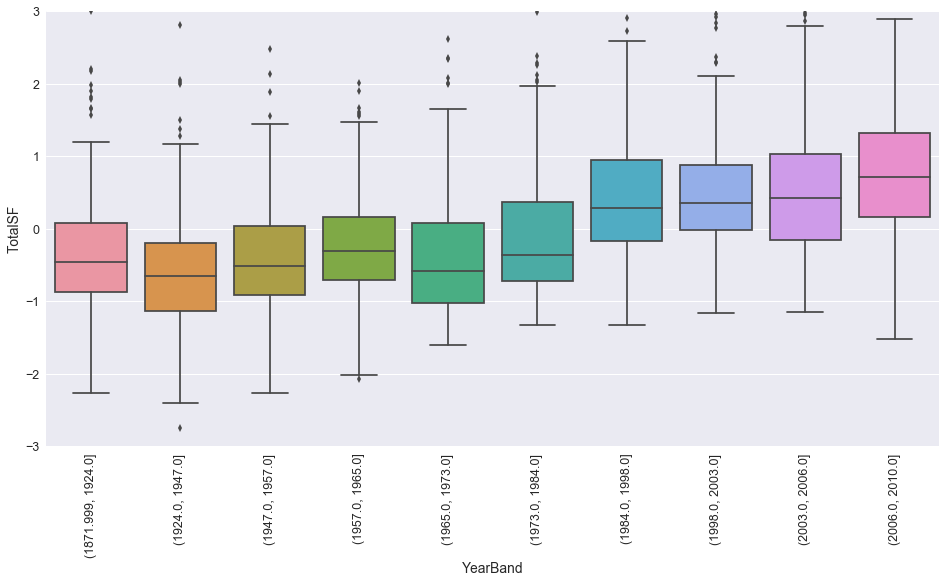

In [219]:
var = 'YearBand'
data = pd.concat([x_features_standardized['TotalSF'], x_features_standardized[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="TotalSF", data=data)
fig.axis(ymin=-3, ymax=3);
plt.xticks(rotation=90);

In [220]:
x_combine = [x_features, x_features_standardized]

for dataset in x_combine:
    dataset.loc[ dataset['YearBuilt'] <= 1871.999, 'YearBuilt'] = 0
    dataset.loc[(dataset['YearBuilt'] > 1871.999) & (dataset['YearBuilt'] <= 1924.0), 'YearBuilt'] = 1
    dataset.loc[(dataset['YearBuilt'] > 1924.0) & (dataset['YearBuilt'] <= 1947.0), 'YearBuilt'] = 2
    dataset.loc[(dataset['YearBuilt'] > 1947.0) & (dataset['YearBuilt'] <= 1958.0), 'YearBuilt'] = 3
    dataset.loc[(dataset['YearBuilt'] > 1958.0) & (dataset['YearBuilt'] <= 1966.0), 'YearBuilt'] = 4
    dataset.loc[(dataset['YearBuilt'] > 1966.0) & (dataset['YearBuilt'] <= 1973.0), 'YearBuilt'] = 5
    dataset.loc[(dataset['YearBuilt'] > 1973.0) & (dataset['YearBuilt'] <= 1985.2), 'YearBuilt'] = 6
    dataset.loc[(dataset['YearBuilt'] > 1985.2) & (dataset['YearBuilt'] <= 1998.0), 'YearBuilt'] = 7
    dataset.loc[(dataset['YearBuilt'] > 1998.0) & (dataset['YearBuilt'] <= 2003.0), 'YearBuilt'] = 8
    dataset.loc[(dataset['YearBuilt'] > 2003.0) & (dataset['YearBuilt'] <= 2006.0), 'YearBuilt'] = 9
    dataset.loc[(dataset['YearBuilt'] > 2006.0) & (dataset['YearBuilt'] <= 2010.0), 'YearBuilt'] = 10
    dataset.loc[ dataset['YearBuilt'] > 2010.0, 'YearBuilt'] = 11
    dataset['YearBuilt'] = dataset['YearBuilt'].astype(int)
    dataset = dataset.drop(['YearBand'], axis=1)

In [221]:
x_features = x_features.drop(['YearBand'], axis=1)
x_features_standardized = x_features_standardized.drop(['YearBand'], axis=1)

In [222]:
x_features.head()

Id  OverallQual  GrLivArea  GarageCars   TotalSF  FullBath  \
train_df 0   1            7   7.444249         2.0  7.850104         2   
         1   2            6   7.140453         2.0  7.833600         2   
         2   3            7   7.487734         2.0  7.903227         2   
         3   4            7   7.448334         3.0  7.813187         1   
         4   5            8   7.695303         3.0  8.114624         2   

            TotRmsAbvGrd  YearBuilt  KitchenQual_Ex  KitchenQual_Fa  \
train_df 0             8          8               0               0   
         1             6          6               0               0   
         2             6          8               0               0   
         3             7          1               0               0   
         4             9          8               0               0   

               ...       FireplaceQu_TA  SaleType_COD  SaleType_CWD  \
train_df 0     ...                    0             0             0   
         1     ...                    1             0             0   
         2     ...                    1             0             0   
         3     ...                    0             0             0   
         4     ...                    1             0             0   

            SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
train_df 0             0               0               0               0   
         1             0               0               0               0   
         2             0               0               0               0   
         3             0               0               0               0   
         4             0               0               0               0   

            SaleType_New  SaleType_Oth  SaleType_WD  
train_df 0             0             0            1  
         1             0             0            1  
         2             0             0            1  
         3             0             0            1  
         4             0             0            1  

[5 rows x 32 columns]

In [223]:
x_features_standardized.head()

Id  OverallQual  GrLivArea  GarageCars   TotalSF  FullBath  \
train_df 0   1            7   0.413476         2.0  0.022999         2   
         1   2            6  -0.471810         2.0 -0.029167         2   
         2   3            7   0.563659         2.0  0.196886         2   
         3   4            7   0.427309         3.0 -0.092511         1   
         4   5            8   1.377806         3.0  0.988072         2   

            TotRmsAbvGrd  YearBuilt  KitchenQual_Ex  KitchenQual_Fa  \
train_df 0             8          8               0               0   
         1             6          6               0               0   
         2             6          8               0               0   
         3             7          1               0               0   
         4             9          8               0               0   

               ...       FireplaceQu_TA  SaleType_COD  SaleType_CWD  \
train_df 0     ...                    0             0             0   
         1     ...                    1             0             0   
         2     ...                    1             0             0   
         3     ...                    0             0             0   
         4     ...                    1             0             0   

            SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
train_df 0             0               0               0               0   
         1             0               0               0               0   
         2             0               0               0               0   
         3             0               0               0               0   
         4             0               0               0               0   

            SaleType_New  SaleType_Oth  SaleType_WD  
train_df 0             0             0            1  
         1             0             0            1  
         2             0             0            1  
         3             0             0            1  
         4             0             0            1  

[5 rows x 32 columns]

In [264]:
train_features = x_features.loc['train_df'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features = x_features.loc['test_df'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

train_features_st = x_features_standardized.loc['train_df'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features_st = x_features_standardized.loc['test_df'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

In [265]:
x_train = train_features
y_train = np.log(train_labels)[:, np.newaxis]

x_test = test_features

x_train_st = train_features_st
y_train_st = y_train

x_test_st = test_features_st

x_train.shape, y_train.shape, x_test.shape, x_train_st.shape, y_train_st.shape, x_test_st.shape

((1460, 31), (1460, 1), (1459, 31), (1460, 31), (1460, 1), (1459, 31))

In [277]:
tf.reset_default_graph()

In [278]:
learning_rate = 0.001
total_numbers = 500000

X = tf.placeholder(tf.float32, [None, 31])
Y = tf.placeholder(tf.float32, [None, 1])

with tf.variable_scope('cell', reuse=None) as scope:
    W1 = tf.get_variable("Weight1", shape=[31, 1],
                     initializer= tf.contrib.layers.variance_scaling_initializer())
    b1 = tf.Variable(tf.random_normal([1]), name='bias1')
    
    W2 = tf.get_variable("Weight2", shape=[31, 1],
                     initializer= tf.contrib.layers.variance_scaling_initializer())
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    
    hypothesis = tf.matmul(X, W1) + b1
    hypothesis_st = tf.matmul(X, W2) + b2
    
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    cost_st = tf.reduce_mean(tf.square(hypothesis_st - Y))
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    optimizer_st = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_st)
    
sess = tf.Session()

sess.run(tf.global_variables_initializer())
    
for step in tqdm(range(total_numbers)):
    c, h, _ = sess.run([cost, hypothesis, optimizer], feed_dict={X: x_train, Y: y_train})
    c_st, h_st, _ = sess.run([cost_st, hypothesis_st, optimizer_st], feed_dict={X: x_train_st, Y: y_train_st})
        
    if step % 100 == 0:
        print(step, "Cost: ", c, "\tCost_st: ", c_st)

0 Cost:  147.727 	Cost_st:  292.916
100 Cost:  0.650137 	Cost_st:  1.60516
200 Cost:  0.386252 	Cost_st:  1.18447
300 Cost:  0.265545 	Cost_st:  1.0482
400 Cost:  0.200886 	Cost_st:  0.984141
500 Cost:  0.164389 	Cost_st:  0.945992
600 Cost:  0.14273 	Cost_st:  0.919395
700 Cost:  0.129028 	Cost_st:  0.898742
800 Cost:  0.11968 	Cost_st:  0.881532
900 Cost:  0.112789 	Cost_st:  0.86654
1000 Cost:  0.10735 	Cost_st:  0.853105
1100 Cost:  0.102821 	Cost_st:  0.840831
1200 Cost:  0.0989069 	Cost_st:  0.829467
1300 Cost:  0.0954411 	Cost_st:  0.818836
1400 Cost:  0.0923249 	Cost_st:  0.808815
1500 Cost:  0.0894965 	Cost_st:  0.799309
1600 Cost:  0.0869144 	Cost_st:  0.790247
1700 Cost:  0.0845483 	Cost_st:  0.781573
1800 Cost:  0.0823749 	Cost_st:  0.773242
1900 Cost:  0.0803749 	Cost_st:  0.765218
2000 Cost:  0.0785319 	Cost_st:  0.757471
2100 Cost:  0.0768316 	Cost_st:  0.749977
2200 Cost:  0.0752613 	Cost_st:  0.742714
2300 Cost:  0.0738097 	Cost_st:  0.735665
2400 Cost:  0.0724666 	Cos

19500 Cost:  0.0480473 	Cost_st:  0.264803
19600 Cost:  0.0480256 	Cost_st:  0.263534
19700 Cost:  0.0480041 	Cost_st:  0.262272
19800 Cost:  0.0479826 	Cost_st:  0.261019
19900 Cost:  0.0479613 	Cost_st:  0.259773
20000 Cost:  0.04794 	Cost_st:  0.258535
20100 Cost:  0.0479189 	Cost_st:  0.257305
20200 Cost:  0.047898 	Cost_st:  0.256083
20300 Cost:  0.0478771 	Cost_st:  0.254869
20400 Cost:  0.0478563 	Cost_st:  0.253663
20500 Cost:  0.0478357 	Cost_st:  0.252463
20600 Cost:  0.0478151 	Cost_st:  0.251272
20700 Cost:  0.0477947 	Cost_st:  0.250088
20800 Cost:  0.0477743 	Cost_st:  0.248912
20900 Cost:  0.0477541 	Cost_st:  0.247742
21000 Cost:  0.047734 	Cost_st:  0.24658
21100 Cost:  0.0477139 	Cost_st:  0.245426
21200 Cost:  0.047694 	Cost_st:  0.244278
21300 Cost:  0.0476742 	Cost_st:  0.243138
21400 Cost:  0.0476544 	Cost_st:  0.242005
21500 Cost:  0.0476348 	Cost_st:  0.240879
21600 Cost:  0.0476152 	Cost_st:  0.23976
21700 Cost:  0.0475958 	Cost_st:  0.238648
21800 Cost:  0.047

38700 Cost:  0.0451409 	Cost_st:  0.120149
38800 Cost:  0.0451296 	Cost_st:  0.119737
38900 Cost:  0.0451183 	Cost_st:  0.119326
39000 Cost:  0.0451071 	Cost_st:  0.118919
39100 Cost:  0.0450958 	Cost_st:  0.118514
39200 Cost:  0.0450846 	Cost_st:  0.118111
39300 Cost:  0.0450734 	Cost_st:  0.117709
39400 Cost:  0.0450622 	Cost_st:  0.117311
39500 Cost:  0.0450511 	Cost_st:  0.116915
39600 Cost:  0.04504 	Cost_st:  0.11652
39700 Cost:  0.0450288 	Cost_st:  0.116127
39800 Cost:  0.0450178 	Cost_st:  0.115738
39900 Cost:  0.0450067 	Cost_st:  0.11535
40000 Cost:  0.0449956 	Cost_st:  0.114964
40100 Cost:  0.0449846 	Cost_st:  0.114579
40200 Cost:  0.0449736 	Cost_st:  0.114198
40300 Cost:  0.0449626 	Cost_st:  0.113819
40400 Cost:  0.0449517 	Cost_st:  0.113441
40500 Cost:  0.0449407 	Cost_st:  0.113065
40600 Cost:  0.0449298 	Cost_st:  0.112691
40700 Cost:  0.0449189 	Cost_st:  0.11232
40800 Cost:  0.044908 	Cost_st:  0.11195
40900 Cost:  0.0448971 	Cost_st:  0.111582
41000 Cost:  0.044

57600 Cost:  0.0433113 	Cost_st:  0.0706566
57700 Cost:  0.0433029 	Cost_st:  0.0705005
57800 Cost:  0.0432944 	Cost_st:  0.0703449
57900 Cost:  0.043286 	Cost_st:  0.07019
58000 Cost:  0.0432776 	Cost_st:  0.0700355
58100 Cost:  0.0432691 	Cost_st:  0.069882
58200 Cost:  0.0432608 	Cost_st:  0.0697299
58300 Cost:  0.0432524 	Cost_st:  0.0695784
58400 Cost:  0.0432439 	Cost_st:  0.0694274
58500 Cost:  0.0432356 	Cost_st:  0.069277
58600 Cost:  0.0432272 	Cost_st:  0.0691271
58700 Cost:  0.0432188 	Cost_st:  0.0689778
58800 Cost:  0.0432105 	Cost_st:  0.0688292
58900 Cost:  0.0432021 	Cost_st:  0.0686822
59000 Cost:  0.0431938 	Cost_st:  0.0685357
59100 Cost:  0.0431855 	Cost_st:  0.0683898
59200 Cost:  0.0431772 	Cost_st:  0.0682444
59300 Cost:  0.0431689 	Cost_st:  0.0680995
59400 Cost:  0.0431605 	Cost_st:  0.067955
59500 Cost:  0.0431523 	Cost_st:  0.0678111
59600 Cost:  0.043144 	Cost_st:  0.067669
59700 Cost:  0.0431357 	Cost_st:  0.0675273
59800 Cost:  0.0431274 	Cost_st:  0.0673

76400 Cost:  0.0418634 	Cost_st:  0.0509888
76500 Cost:  0.0418563 	Cost_st:  0.0509219
76600 Cost:  0.0418493 	Cost_st:  0.0508551
76700 Cost:  0.0418423 	Cost_st:  0.0507884
76800 Cost:  0.0418352 	Cost_st:  0.050722
76900 Cost:  0.0418282 	Cost_st:  0.0506558
77000 Cost:  0.0418212 	Cost_st:  0.0505898
77100 Cost:  0.0418142 	Cost_st:  0.0505247
77200 Cost:  0.0418071 	Cost_st:  0.05046
77300 Cost:  0.0418001 	Cost_st:  0.0503955
77400 Cost:  0.0417931 	Cost_st:  0.0503311
77500 Cost:  0.0417861 	Cost_st:  0.050267
77600 Cost:  0.0417791 	Cost_st:  0.0502031
77700 Cost:  0.0417721 	Cost_st:  0.0501394
77800 Cost:  0.0417651 	Cost_st:  0.0500759
77900 Cost:  0.0417581 	Cost_st:  0.0500126
78000 Cost:  0.0417511 	Cost_st:  0.0499495
78100 Cost:  0.0417442 	Cost_st:  0.0498865
78200 Cost:  0.0417372 	Cost_st:  0.0498237
78300 Cost:  0.0417302 	Cost_st:  0.0497615
78400 Cost:  0.0417233 	Cost_st:  0.0497
78500 Cost:  0.0417163 	Cost_st:  0.0496387
78600 Cost:  0.0417094 	Cost_st:  0.049

95200 Cost:  0.0406212 	Cost_st:  0.0421125
95300 Cost:  0.0406149 	Cost_st:  0.0420803
95400 Cost:  0.0406088 	Cost_st:  0.0420482
95500 Cost:  0.0406025 	Cost_st:  0.0420162
95600 Cost:  0.0405963 	Cost_st:  0.0419843
95700 Cost:  0.0405901 	Cost_st:  0.0419524
95800 Cost:  0.0405839 	Cost_st:  0.0419206
95900 Cost:  0.0405778 	Cost_st:  0.0418889
96000 Cost:  0.0405716 	Cost_st:  0.0418573
96100 Cost:  0.0405655 	Cost_st:  0.0418258
96200 Cost:  0.0405593 	Cost_st:  0.0417944
96300 Cost:  0.0405532 	Cost_st:  0.0417631
96400 Cost:  0.0405471 	Cost_st:  0.0417319
96500 Cost:  0.040541 	Cost_st:  0.0417007
96600 Cost:  0.0405349 	Cost_st:  0.0416697
96700 Cost:  0.0405288 	Cost_st:  0.0416386
96800 Cost:  0.0405226 	Cost_st:  0.0416077
96900 Cost:  0.0405166 	Cost_st:  0.0415768
97000 Cost:  0.0405104 	Cost_st:  0.0415465
97100 Cost:  0.0405044 	Cost_st:  0.0415163
97200 Cost:  0.0404982 	Cost_st:  0.0414863
97300 Cost:  0.0404922 	Cost_st:  0.0414563
97400 Cost:  0.0404861 	Cost_st: 

113600 Cost:  0.0395433 	Cost_st:  0.0376542
113700 Cost:  0.0395378 	Cost_st:  0.0376362
113800 Cost:  0.0395322 	Cost_st:  0.0376182
113900 Cost:  0.0395267 	Cost_st:  0.0376003
114000 Cost:  0.0395211 	Cost_st:  0.0375824
114100 Cost:  0.0395156 	Cost_st:  0.0375645
114200 Cost:  0.0395101 	Cost_st:  0.0375467
114300 Cost:  0.0395045 	Cost_st:  0.0375293
114400 Cost:  0.039499 	Cost_st:  0.0375119
114500 Cost:  0.0394935 	Cost_st:  0.0374946
114600 Cost:  0.0394879 	Cost_st:  0.0374773
114700 Cost:  0.0394824 	Cost_st:  0.0374601
114800 Cost:  0.0394769 	Cost_st:  0.0374429
114900 Cost:  0.0394713 	Cost_st:  0.0374257
115000 Cost:  0.0394658 	Cost_st:  0.0374086
115100 Cost:  0.0394603 	Cost_st:  0.0373915
115200 Cost:  0.0394548 	Cost_st:  0.0373744
115300 Cost:  0.0394493 	Cost_st:  0.0373575
115400 Cost:  0.0394438 	Cost_st:  0.0373405
115500 Cost:  0.0394383 	Cost_st:  0.0373236
115600 Cost:  0.0394327 	Cost_st:  0.0373067
115700 Cost:  0.0394273 	Cost_st:  0.0372898
115800 Cost

131900 Cost:  0.0385732 	Cost_st:  0.0350752
132000 Cost:  0.0385681 	Cost_st:  0.0350641
132100 Cost:  0.0385631 	Cost_st:  0.035053
132200 Cost:  0.038558 	Cost_st:  0.0350419
132300 Cost:  0.0385529 	Cost_st:  0.0350309
132400 Cost:  0.0385479 	Cost_st:  0.0350198
132500 Cost:  0.0385428 	Cost_st:  0.0350088
132600 Cost:  0.0385377 	Cost_st:  0.0349978
132700 Cost:  0.0385327 	Cost_st:  0.0349868
132800 Cost:  0.0385276 	Cost_st:  0.0349758
132900 Cost:  0.0385225 	Cost_st:  0.0349649
133000 Cost:  0.0385175 	Cost_st:  0.034954
133100 Cost:  0.0385124 	Cost_st:  0.0349431
133200 Cost:  0.0385074 	Cost_st:  0.0349322
133300 Cost:  0.0385023 	Cost_st:  0.0349214
133400 Cost:  0.0384973 	Cost_st:  0.0349107
133500 Cost:  0.0384923 	Cost_st:  0.0349002
133600 Cost:  0.0384872 	Cost_st:  0.0348897
133700 Cost:  0.0384822 	Cost_st:  0.0348793
133800 Cost:  0.0384771 	Cost_st:  0.0348688
133900 Cost:  0.0384721 	Cost_st:  0.0348584
134000 Cost:  0.0384671 	Cost_st:  0.034848
134100 Cost:  

150200 Cost:  0.0376883 	Cost_st:  0.033413
150300 Cost:  0.0376837 	Cost_st:  0.0334055
150400 Cost:  0.0376791 	Cost_st:  0.033398
150500 Cost:  0.0376745 	Cost_st:  0.0333904
150600 Cost:  0.0376699 	Cost_st:  0.0333829
150700 Cost:  0.0376653 	Cost_st:  0.0333754
150800 Cost:  0.0376607 	Cost_st:  0.0333681
150900 Cost:  0.0376561 	Cost_st:  0.0333608
151000 Cost:  0.0376515 	Cost_st:  0.0333536
151100 Cost:  0.0376469 	Cost_st:  0.0333464
151200 Cost:  0.0376423 	Cost_st:  0.0333391
151300 Cost:  0.0376377 	Cost_st:  0.0333319
151400 Cost:  0.0376331 	Cost_st:  0.0333247
151500 Cost:  0.0376286 	Cost_st:  0.0333175
151600 Cost:  0.037624 	Cost_st:  0.0333103
151700 Cost:  0.0376194 	Cost_st:  0.0333031
151800 Cost:  0.0376148 	Cost_st:  0.033296
151900 Cost:  0.0376102 	Cost_st:  0.0332888
152000 Cost:  0.0376056 	Cost_st:  0.0332816
152100 Cost:  0.0376011 	Cost_st:  0.0332745
152200 Cost:  0.0375965 	Cost_st:  0.0332674
152300 Cost:  0.0375919 	Cost_st:  0.0332603
152400 Cost:  

168500 Cost:  0.0368767 	Cost_st:  0.0322533
168600 Cost:  0.0368724 	Cost_st:  0.032248
168700 Cost:  0.0368682 	Cost_st:  0.0322427
168800 Cost:  0.0368639 	Cost_st:  0.0322374
168900 Cost:  0.0368597 	Cost_st:  0.0322322
169000 Cost:  0.0368554 	Cost_st:  0.0322269
169100 Cost:  0.0368512 	Cost_st:  0.0322216
169200 Cost:  0.0368469 	Cost_st:  0.0322163
169300 Cost:  0.0368427 	Cost_st:  0.0322111
169400 Cost:  0.0368385 	Cost_st:  0.0322059
169500 Cost:  0.0368342 	Cost_st:  0.0322006
169600 Cost:  0.03683 	Cost_st:  0.0321954
169700 Cost:  0.0368257 	Cost_st:  0.0321902
169800 Cost:  0.0368215 	Cost_st:  0.032185
169900 Cost:  0.0368173 	Cost_st:  0.0321797
170000 Cost:  0.0368131 	Cost_st:  0.0321745
170100 Cost:  0.0368088 	Cost_st:  0.0321693
170200 Cost:  0.0368046 	Cost_st:  0.0321641
170300 Cost:  0.0368004 	Cost_st:  0.0321589
170400 Cost:  0.0367961 	Cost_st:  0.0321537
170500 Cost:  0.0367919 	Cost_st:  0.0321486
170600 Cost:  0.0367877 	Cost_st:  0.0321434
170700 Cost:  

186800 Cost:  0.0361279 	Cost_st:  0.0313975
186900 Cost:  0.036124 	Cost_st:  0.0313934
187000 Cost:  0.03612 	Cost_st:  0.0313893
187100 Cost:  0.0361161 	Cost_st:  0.0313852
187200 Cost:  0.0361122 	Cost_st:  0.0313811
187300 Cost:  0.0361082 	Cost_st:  0.031377
187400 Cost:  0.0361043 	Cost_st:  0.0313729
187500 Cost:  0.0361004 	Cost_st:  0.0313688
187600 Cost:  0.0360965 	Cost_st:  0.0313647
187700 Cost:  0.0360925 	Cost_st:  0.0313606
187800 Cost:  0.0360886 	Cost_st:  0.0313566
187900 Cost:  0.0360847 	Cost_st:  0.0313525
188000 Cost:  0.0360808 	Cost_st:  0.0313485
188100 Cost:  0.0360768 	Cost_st:  0.0313444
188200 Cost:  0.0360729 	Cost_st:  0.0313404
188300 Cost:  0.036069 	Cost_st:  0.0313363
188400 Cost:  0.0360651 	Cost_st:  0.0313323
188500 Cost:  0.0360612 	Cost_st:  0.0313283
188600 Cost:  0.0360572 	Cost_st:  0.0313243
188700 Cost:  0.0360533 	Cost_st:  0.0313202
188800 Cost:  0.0360494 	Cost_st:  0.0313162
188900 Cost:  0.0360455 	Cost_st:  0.0313122
189000 Cost:  0

205200 Cost:  0.0354321 	Cost_st:  0.0307327
205300 Cost:  0.0354284 	Cost_st:  0.0307294
205400 Cost:  0.0354248 	Cost_st:  0.0307262
205500 Cost:  0.0354211 	Cost_st:  0.030723
205600 Cost:  0.0354175 	Cost_st:  0.0307198
205700 Cost:  0.0354138 	Cost_st:  0.0307166
205800 Cost:  0.0354102 	Cost_st:  0.0307134
205900 Cost:  0.0354065 	Cost_st:  0.0307102
206000 Cost:  0.0354029 	Cost_st:  0.030707
206100 Cost:  0.0353993 	Cost_st:  0.0307038
206200 Cost:  0.0353956 	Cost_st:  0.0307006
206300 Cost:  0.035392 	Cost_st:  0.0306974
206400 Cost:  0.0353883 	Cost_st:  0.0306942
206500 Cost:  0.0353847 	Cost_st:  0.030691
206600 Cost:  0.035381 	Cost_st:  0.0306878
206700 Cost:  0.0353774 	Cost_st:  0.0306847
206800 Cost:  0.0353738 	Cost_st:  0.0306815
206900 Cost:  0.0353701 	Cost_st:  0.0306783
207000 Cost:  0.0353665 	Cost_st:  0.0306752
207100 Cost:  0.0353629 	Cost_st:  0.030672
207200 Cost:  0.0353593 	Cost_st:  0.0306688
207300 Cost:  0.0353556 	Cost_st:  0.0306657
207400 Cost:  0.

223700 Cost:  0.0347854 	Cost_st:  0.0302044
223800 Cost:  0.034782 	Cost_st:  0.0302018
223900 Cost:  0.0347787 	Cost_st:  0.0301993
224000 Cost:  0.0347754 	Cost_st:  0.0301968
224100 Cost:  0.034772 	Cost_st:  0.0301942
224200 Cost:  0.0347687 	Cost_st:  0.0301917
224300 Cost:  0.0347653 	Cost_st:  0.0301892
224400 Cost:  0.034762 	Cost_st:  0.0301867
224500 Cost:  0.0347587 	Cost_st:  0.0301841
224600 Cost:  0.0347553 	Cost_st:  0.0301816
224700 Cost:  0.034752 	Cost_st:  0.0301791
224800 Cost:  0.0347487 	Cost_st:  0.0301766
224900 Cost:  0.0347454 	Cost_st:  0.0301741
225000 Cost:  0.034742 	Cost_st:  0.0301716
225100 Cost:  0.0347387 	Cost_st:  0.0301691
225200 Cost:  0.0347354 	Cost_st:  0.0301665
225300 Cost:  0.034732 	Cost_st:  0.030164
225400 Cost:  0.0347287 	Cost_st:  0.0301615
225500 Cost:  0.0347254 	Cost_st:  0.030159
225600 Cost:  0.0347221 	Cost_st:  0.0301565
225700 Cost:  0.0347188 	Cost_st:  0.030154
225800 Cost:  0.0347154 	Cost_st:  0.0301515
225900 Cost:  0.034

242200 Cost:  0.0341849 	Cost_st:  0.029779
242300 Cost:  0.0341817 	Cost_st:  0.0297769
242400 Cost:  0.0341785 	Cost_st:  0.0297748
242500 Cost:  0.0341754 	Cost_st:  0.0297728
242600 Cost:  0.0341722 	Cost_st:  0.0297707
242700 Cost:  0.0341691 	Cost_st:  0.0297687
242800 Cost:  0.0341659 	Cost_st:  0.0297666
242900 Cost:  0.0341628 	Cost_st:  0.0297646
243000 Cost:  0.0341596 	Cost_st:  0.0297626
243100 Cost:  0.0341565 	Cost_st:  0.0297605
243200 Cost:  0.0341533 	Cost_st:  0.0297585
243300 Cost:  0.0341502 	Cost_st:  0.0297565
243400 Cost:  0.0341471 	Cost_st:  0.0297544
243500 Cost:  0.0341439 	Cost_st:  0.0297524
243600 Cost:  0.0341408 	Cost_st:  0.0297504
243700 Cost:  0.0341377 	Cost_st:  0.0297484
243800 Cost:  0.0341345 	Cost_st:  0.0297464
243900 Cost:  0.0341314 	Cost_st:  0.0297443
244000 Cost:  0.0341282 	Cost_st:  0.0297423
244100 Cost:  0.0341251 	Cost_st:  0.0297403
244200 Cost:  0.034122 	Cost_st:  0.0297383
244300 Cost:  0.0341188 	Cost_st:  0.0297363
244400 Cost:

260600 Cost:  0.0336288 	Cost_st:  0.0294334
260700 Cost:  0.0336259 	Cost_st:  0.0294317
260800 Cost:  0.033623 	Cost_st:  0.0294299
260900 Cost:  0.0336201 	Cost_st:  0.0294282
261000 Cost:  0.0336172 	Cost_st:  0.0294265
261100 Cost:  0.0336143 	Cost_st:  0.0294248
261200 Cost:  0.0336114 	Cost_st:  0.0294231
261300 Cost:  0.0336085 	Cost_st:  0.0294214
261400 Cost:  0.0336057 	Cost_st:  0.0294197
261500 Cost:  0.0336028 	Cost_st:  0.0294179
261600 Cost:  0.0335999 	Cost_st:  0.0294162
261700 Cost:  0.033597 	Cost_st:  0.0294145
261800 Cost:  0.0335941 	Cost_st:  0.0294128
261900 Cost:  0.0335912 	Cost_st:  0.0294111
262000 Cost:  0.0335884 	Cost_st:  0.0294094
262100 Cost:  0.0335855 	Cost_st:  0.0294077
262200 Cost:  0.0335826 	Cost_st:  0.029406
262300 Cost:  0.0335798 	Cost_st:  0.0294043
262400 Cost:  0.0335769 	Cost_st:  0.0294026
262500 Cost:  0.033574 	Cost_st:  0.0294009
262600 Cost:  0.0335711 	Cost_st:  0.0293992
262700 Cost:  0.0335683 	Cost_st:  0.0293975
262800 Cost:  

279000 Cost:  0.0331113 	Cost_st:  0.0291435
279100 Cost:  0.0331085 	Cost_st:  0.0291422
279200 Cost:  0.0331058 	Cost_st:  0.0291408
279300 Cost:  0.0331031 	Cost_st:  0.0291394
279400 Cost:  0.0331003 	Cost_st:  0.029138
279500 Cost:  0.0330976 	Cost_st:  0.0291366
279600 Cost:  0.0330949 	Cost_st:  0.0291353
279700 Cost:  0.0330921 	Cost_st:  0.0291339
279800 Cost:  0.0330894 	Cost_st:  0.0291325
279900 Cost:  0.0330867 	Cost_st:  0.0291311
280000 Cost:  0.0330839 	Cost_st:  0.0291297
280100 Cost:  0.0330812 	Cost_st:  0.0291284
280200 Cost:  0.0330785 	Cost_st:  0.029127
280300 Cost:  0.0330757 	Cost_st:  0.0291256
280400 Cost:  0.033073 	Cost_st:  0.0291242
280500 Cost:  0.0330703 	Cost_st:  0.0291228
280600 Cost:  0.0330676 	Cost_st:  0.0291215
280700 Cost:  0.0330648 	Cost_st:  0.0291201
280800 Cost:  0.0330621 	Cost_st:  0.0291187
280900 Cost:  0.0330594 	Cost_st:  0.0291174
281000 Cost:  0.0330567 	Cost_st:  0.029116
281100 Cost:  0.0330539 	Cost_st:  0.0291146
281200 Cost:  

297400 Cost:  0.0326286 	Cost_st:  0.0289077
297500 Cost:  0.0326261 	Cost_st:  0.0289065
297600 Cost:  0.0326236 	Cost_st:  0.0289053
297700 Cost:  0.0326211 	Cost_st:  0.0289041
297800 Cost:  0.0326186 	Cost_st:  0.0289029
297900 Cost:  0.0326161 	Cost_st:  0.0289018
298000 Cost:  0.0326136 	Cost_st:  0.0289006
298100 Cost:  0.0326111 	Cost_st:  0.0288994
298200 Cost:  0.0326086 	Cost_st:  0.0288982
298300 Cost:  0.0326061 	Cost_st:  0.0288971
298400 Cost:  0.0326035 	Cost_st:  0.0288959
298500 Cost:  0.0326011 	Cost_st:  0.0288947
298600 Cost:  0.0325985 	Cost_st:  0.0288936
298700 Cost:  0.032596 	Cost_st:  0.0288924
298800 Cost:  0.0325936 	Cost_st:  0.0288912
298900 Cost:  0.0325911 	Cost_st:  0.0288901
299000 Cost:  0.0325885 	Cost_st:  0.0288889
299100 Cost:  0.0325861 	Cost_st:  0.0288877
299200 Cost:  0.0325836 	Cost_st:  0.0288865
299300 Cost:  0.0325811 	Cost_st:  0.0288854
299400 Cost:  0.0325786 	Cost_st:  0.0288842
299500 Cost:  0.0325761 	Cost_st:  0.028883
299600 Cost:

315700 Cost:  0.0321809 	Cost_st:  0.0287086
315800 Cost:  0.0321785 	Cost_st:  0.0287076
315900 Cost:  0.0321761 	Cost_st:  0.0287066
316000 Cost:  0.0321737 	Cost_st:  0.0287057
316100 Cost:  0.0321713 	Cost_st:  0.0287047
316200 Cost:  0.0321689 	Cost_st:  0.0287037
316300 Cost:  0.0321666 	Cost_st:  0.0287027
316400 Cost:  0.0321642 	Cost_st:  0.0287017
316500 Cost:  0.0321618 	Cost_st:  0.0287007
316600 Cost:  0.0321594 	Cost_st:  0.0286998
316700 Cost:  0.032157 	Cost_st:  0.0286988
316800 Cost:  0.0321547 	Cost_st:  0.0286978
316900 Cost:  0.0321523 	Cost_st:  0.0286968
317000 Cost:  0.0321499 	Cost_st:  0.0286959
317100 Cost:  0.0321475 	Cost_st:  0.0286949
317200 Cost:  0.0321452 	Cost_st:  0.0286939
317300 Cost:  0.0321428 	Cost_st:  0.0286929
317400 Cost:  0.0321404 	Cost_st:  0.0286919
317500 Cost:  0.032138 	Cost_st:  0.028691
317600 Cost:  0.0321357 	Cost_st:  0.02869
317700 Cost:  0.0321333 	Cost_st:  0.028689
317800 Cost:  0.0321309 	Cost_st:  0.028688
317900 Cost:  0.0

334100 Cost:  0.0317579 	Cost_st:  0.0285392
334200 Cost:  0.0317558 	Cost_st:  0.0285383
334300 Cost:  0.0317536 	Cost_st:  0.0285375
334400 Cost:  0.0317514 	Cost_st:  0.0285366
334500 Cost:  0.0317492 	Cost_st:  0.0285358
334600 Cost:  0.031747 	Cost_st:  0.0285349
334700 Cost:  0.0317448 	Cost_st:  0.0285341
334800 Cost:  0.0317427 	Cost_st:  0.0285332
334900 Cost:  0.0317405 	Cost_st:  0.0285324
335000 Cost:  0.0317383 	Cost_st:  0.0285315
335100 Cost:  0.0317361 	Cost_st:  0.0285307
335200 Cost:  0.031734 	Cost_st:  0.0285298
335300 Cost:  0.0317318 	Cost_st:  0.028529
335400 Cost:  0.0317296 	Cost_st:  0.0285282
335500 Cost:  0.0317275 	Cost_st:  0.0285273
335600 Cost:  0.0317253 	Cost_st:  0.0285265
335700 Cost:  0.0317231 	Cost_st:  0.0285256
335800 Cost:  0.0317209 	Cost_st:  0.0285248
335900 Cost:  0.0317188 	Cost_st:  0.0285239
336000 Cost:  0.0317166 	Cost_st:  0.0285231
336100 Cost:  0.0317144 	Cost_st:  0.0285223
336200 Cost:  0.0317122 	Cost_st:  0.0285214
336300 Cost: 

352500 Cost:  0.0313662 	Cost_st:  0.0283929
352600 Cost:  0.0313641 	Cost_st:  0.0283922
352700 Cost:  0.031362 	Cost_st:  0.0283914
352800 Cost:  0.0313599 	Cost_st:  0.0283907
352900 Cost:  0.0313579 	Cost_st:  0.02839
353000 Cost:  0.0313558 	Cost_st:  0.0283892
353100 Cost:  0.0313537 	Cost_st:  0.0283885
353200 Cost:  0.0313516 	Cost_st:  0.0283878
353300 Cost:  0.0313496 	Cost_st:  0.028387
353400 Cost:  0.0313475 	Cost_st:  0.0283863
353500 Cost:  0.0313454 	Cost_st:  0.0283856
353600 Cost:  0.0313434 	Cost_st:  0.0283848
353700 Cost:  0.0313413 	Cost_st:  0.0283841
353800 Cost:  0.0313392 	Cost_st:  0.0283834
353900 Cost:  0.0313372 	Cost_st:  0.0283826
354000 Cost:  0.0313351 	Cost_st:  0.0283819
354100 Cost:  0.031333 	Cost_st:  0.0283812
354200 Cost:  0.031331 	Cost_st:  0.0283805
354300 Cost:  0.0313289 	Cost_st:  0.0283797
354400 Cost:  0.0313268 	Cost_st:  0.028379
354500 Cost:  0.0313248 	Cost_st:  0.0283783
354600 Cost:  0.0313227 	Cost_st:  0.0283775
354700 Cost:  0.0

370900 Cost:  0.0309937 	Cost_st:  0.0282726
371000 Cost:  0.0309917 	Cost_st:  0.028272
371100 Cost:  0.0309897 	Cost_st:  0.0282715
371200 Cost:  0.0309877 	Cost_st:  0.0282708
371300 Cost:  0.0309858 	Cost_st:  0.0282703
371400 Cost:  0.0309838 	Cost_st:  0.0282697
371500 Cost:  0.0309819 	Cost_st:  0.0282691
371600 Cost:  0.0309799 	Cost_st:  0.0282685
371700 Cost:  0.030978 	Cost_st:  0.0282679
371800 Cost:  0.030976 	Cost_st:  0.0282674
371900 Cost:  0.0309741 	Cost_st:  0.0282668
372000 Cost:  0.0309721 	Cost_st:  0.0282662
372100 Cost:  0.0309702 	Cost_st:  0.0282656
372200 Cost:  0.0309683 	Cost_st:  0.028265
372300 Cost:  0.0309663 	Cost_st:  0.0282645
372400 Cost:  0.0309644 	Cost_st:  0.0282639
372500 Cost:  0.0309625 	Cost_st:  0.0282633
372600 Cost:  0.0309606 	Cost_st:  0.0282627
372700 Cost:  0.0309587 	Cost_st:  0.0282622
372800 Cost:  0.0309568 	Cost_st:  0.0282616
372900 Cost:  0.0309549 	Cost_st:  0.028261
373000 Cost:  0.030953 	Cost_st:  0.0282604
373100 Cost:  0.

389300 Cost:  0.0306517 	Cost_st:  0.0281717
389400 Cost:  0.0306499 	Cost_st:  0.0281712
389500 Cost:  0.0306481 	Cost_st:  0.0281707
389600 Cost:  0.0306463 	Cost_st:  0.0281702
389700 Cost:  0.0306445 	Cost_st:  0.0281697
389800 Cost:  0.0306427 	Cost_st:  0.0281692
389900 Cost:  0.0306409 	Cost_st:  0.0281687
390000 Cost:  0.0306391 	Cost_st:  0.0281682
390100 Cost:  0.0306373 	Cost_st:  0.0281677
390200 Cost:  0.0306355 	Cost_st:  0.0281671
390300 Cost:  0.0306337 	Cost_st:  0.0281666
390400 Cost:  0.0306319 	Cost_st:  0.0281661
390500 Cost:  0.0306301 	Cost_st:  0.0281656
390600 Cost:  0.0306283 	Cost_st:  0.0281651
390700 Cost:  0.0306265 	Cost_st:  0.0281646
390800 Cost:  0.0306247 	Cost_st:  0.0281641
390900 Cost:  0.0306229 	Cost_st:  0.0281636
391000 Cost:  0.0306211 	Cost_st:  0.0281631
391100 Cost:  0.0306193 	Cost_st:  0.0281626
391200 Cost:  0.0306175 	Cost_st:  0.0281621
391300 Cost:  0.0306157 	Cost_st:  0.0281616
391400 Cost:  0.0306139 	Cost_st:  0.0281611
391500 Cos

407600 Cost:  0.0303286 	Cost_st:  0.0280855
407700 Cost:  0.0303269 	Cost_st:  0.0280851
407800 Cost:  0.0303252 	Cost_st:  0.0280847
407900 Cost:  0.0303234 	Cost_st:  0.0280842
408000 Cost:  0.0303217 	Cost_st:  0.0280838
408100 Cost:  0.03032 	Cost_st:  0.0280834
408200 Cost:  0.0303183 	Cost_st:  0.0280829
408300 Cost:  0.0303166 	Cost_st:  0.0280825
408400 Cost:  0.0303148 	Cost_st:  0.0280821
408500 Cost:  0.0303131 	Cost_st:  0.0280816
408600 Cost:  0.0303114 	Cost_st:  0.0280812
408700 Cost:  0.0303097 	Cost_st:  0.0280808
408800 Cost:  0.0303079 	Cost_st:  0.0280803
408900 Cost:  0.0303062 	Cost_st:  0.0280799
409000 Cost:  0.0303045 	Cost_st:  0.0280795
409100 Cost:  0.0303028 	Cost_st:  0.028079
409200 Cost:  0.0303011 	Cost_st:  0.0280786
409300 Cost:  0.0302993 	Cost_st:  0.0280782
409400 Cost:  0.0302976 	Cost_st:  0.0280777
409500 Cost:  0.0302959 	Cost_st:  0.0280773
409600 Cost:  0.0302942 	Cost_st:  0.0280769
409700 Cost:  0.0302925 	Cost_st:  0.0280765
409800 Cost: 

426000 Cost:  0.0300243 	Cost_st:  0.0280118
426100 Cost:  0.0300227 	Cost_st:  0.0280115
426200 Cost:  0.0300211 	Cost_st:  0.0280111
426300 Cost:  0.0300196 	Cost_st:  0.0280107
426400 Cost:  0.030018 	Cost_st:  0.0280103
426500 Cost:  0.0300164 	Cost_st:  0.02801
426600 Cost:  0.0300149 	Cost_st:  0.0280096
426700 Cost:  0.0300133 	Cost_st:  0.0280092
426800 Cost:  0.0300117 	Cost_st:  0.0280088
426900 Cost:  0.0300101 	Cost_st:  0.0280085
427000 Cost:  0.0300086 	Cost_st:  0.0280081
427100 Cost:  0.030007 	Cost_st:  0.0280077
427200 Cost:  0.0300054 	Cost_st:  0.0280074
427300 Cost:  0.0300039 	Cost_st:  0.028007
427400 Cost:  0.0300023 	Cost_st:  0.0280066
427500 Cost:  0.0300007 	Cost_st:  0.0280063
427600 Cost:  0.0299992 	Cost_st:  0.0280059
427700 Cost:  0.0299976 	Cost_st:  0.0280055
427800 Cost:  0.029996 	Cost_st:  0.0280052
427900 Cost:  0.0299945 	Cost_st:  0.0280048
428000 Cost:  0.0299929 	Cost_st:  0.0280044
428100 Cost:  0.0299913 	Cost_st:  0.028004
428200 Cost:  0.0

444300 Cost:  0.0297429 	Cost_st:  0.0279479
444400 Cost:  0.0297414 	Cost_st:  0.0279475
444500 Cost:  0.0297399 	Cost_st:  0.0279472
444600 Cost:  0.0297384 	Cost_st:  0.0279469
444700 Cost:  0.0297369 	Cost_st:  0.0279466
444800 Cost:  0.0297354 	Cost_st:  0.0279463
444900 Cost:  0.0297339 	Cost_st:  0.027946
445000 Cost:  0.0297324 	Cost_st:  0.0279457
445100 Cost:  0.0297309 	Cost_st:  0.0279453
445200 Cost:  0.0297294 	Cost_st:  0.027945
445300 Cost:  0.0297279 	Cost_st:  0.0279447
445400 Cost:  0.0297264 	Cost_st:  0.0279444
445500 Cost:  0.0297249 	Cost_st:  0.0279441
445600 Cost:  0.0297234 	Cost_st:  0.0279437
445700 Cost:  0.0297219 	Cost_st:  0.0279434
445800 Cost:  0.0297204 	Cost_st:  0.0279431
445900 Cost:  0.0297189 	Cost_st:  0.0279428
446000 Cost:  0.0297174 	Cost_st:  0.0279425
446100 Cost:  0.0297159 	Cost_st:  0.0279422
446200 Cost:  0.0297144 	Cost_st:  0.0279419
446300 Cost:  0.0297129 	Cost_st:  0.0279415
446400 Cost:  0.0297114 	Cost_st:  0.0279412
446500 Cost:

462700 Cost:  0.0294728 	Cost_st:  0.0278918
462800 Cost:  0.0294713 	Cost_st:  0.0278915
462900 Cost:  0.0294699 	Cost_st:  0.0278912
463000 Cost:  0.0294685 	Cost_st:  0.0278909
463100 Cost:  0.029467 	Cost_st:  0.0278907
463200 Cost:  0.0294656 	Cost_st:  0.0278904
463300 Cost:  0.0294642 	Cost_st:  0.0278901
463400 Cost:  0.0294627 	Cost_st:  0.0278898
463500 Cost:  0.0294613 	Cost_st:  0.0278895
463600 Cost:  0.0294599 	Cost_st:  0.0278892
463700 Cost:  0.0294584 	Cost_st:  0.0278889
463800 Cost:  0.029457 	Cost_st:  0.0278887
463900 Cost:  0.0294556 	Cost_st:  0.0278884
464000 Cost:  0.0294541 	Cost_st:  0.0278881
464100 Cost:  0.0294527 	Cost_st:  0.0278878
464200 Cost:  0.0294513 	Cost_st:  0.0278875
464300 Cost:  0.0294498 	Cost_st:  0.0278872
464400 Cost:  0.0294484 	Cost_st:  0.027887
464500 Cost:  0.029447 	Cost_st:  0.0278867
464600 Cost:  0.0294456 	Cost_st:  0.0278864
464700 Cost:  0.0294442 	Cost_st:  0.0278861
464800 Cost:  0.0294427 	Cost_st:  0.0278858
464900 Cost:  

481000 Cost:  0.0292239 	Cost_st:  0.0278437
481100 Cost:  0.0292226 	Cost_st:  0.0278434
481200 Cost:  0.0292212 	Cost_st:  0.0278432
481300 Cost:  0.02922 	Cost_st:  0.027843
481400 Cost:  0.0292186 	Cost_st:  0.0278427
481500 Cost:  0.0292174 	Cost_st:  0.0278425
481600 Cost:  0.029216 	Cost_st:  0.0278422
481700 Cost:  0.0292147 	Cost_st:  0.027842
481800 Cost:  0.0292134 	Cost_st:  0.0278418
481900 Cost:  0.0292121 	Cost_st:  0.0278415
482000 Cost:  0.0292108 	Cost_st:  0.0278413
482100 Cost:  0.0292095 	Cost_st:  0.027841
482200 Cost:  0.0292082 	Cost_st:  0.0278408
482300 Cost:  0.0292069 	Cost_st:  0.0278406
482400 Cost:  0.0292056 	Cost_st:  0.0278403
482500 Cost:  0.0292043 	Cost_st:  0.0278401
482600 Cost:  0.029203 	Cost_st:  0.0278398
482700 Cost:  0.0292017 	Cost_st:  0.0278396
482800 Cost:  0.0292004 	Cost_st:  0.0278393
482900 Cost:  0.0291991 	Cost_st:  0.0278391
483000 Cost:  0.0291978 	Cost_st:  0.0278389
483100 Cost:  0.0291965 	Cost_st:  0.0278386
483200 Cost:  0.0

499500 Cost:  0.0289879 	Cost_st:  0.0278018
499600 Cost:  0.0289867 	Cost_st:  0.0278016
499700 Cost:  0.0289854 	Cost_st:  0.0278014
499800 Cost:  0.0289842 	Cost_st:  0.0278011
499900 Cost:  0.0289829 	Cost_st:  0.0278009



In [345]:
resData1 = np.asarray(sess.run(hypothesis, feed_dict={X: x_test}))
resData2 = np.asarray(sess.run(hypothesis_st, feed_dict={X: x_test_st}))
data = (np.exp(resData1) + np.exp(resData2)) / 2
Final_labels = pd.DataFrame(data=np.exp(resData2), index=test_df.Id, columns=['SalePrice'])

Final_labels

,SalePrice
Id,
1461,112807.179688
1462,149286.125000
1463,161258.140625
1464,188066.390625
1465,198592.046875
1466,174075.031250
1467,153447.453125
1468,168054.640625
1469,189103.750000


In [346]:
Final_labels.to_csv('result.csv')